# Time Series Analysis with R - Chapter 1

## This notebook is a walkthrough of *Introductory Time Series with R* by Paul S.P. Cowpertwait and Andrew V. Metcalf (Springer, 2009). We will explore the examples presented in the text with comments about each, providing a high-level overview of the concepts presented. This notebook will also contain *some* of the problems presented at the end of each chapter, though may not include solutions.

## Enjoy!

### Cal Johnson
#### Analytics Engineer
#### AO AAE, USCC

## Chapter 1 - Time Series Data

*Time series anlysis* attempts to quantify main features of a data set and its stochastic variation.

Following along with the book, we see the classic example of a function that calculates factorials recursively, implemented, as with everything in this book and notebook, in *R*:

In [2]:
fact <- function(n) if (n==1) 1 else n * fact(n-1)

And to test in the case that we wish to know what 11! is:

In [3]:
c(fact(11), "Booyah!")

[1] "39916800" "Booyah!"

Data in R are stored in objects, which is useful to us as the language provides an extensive number of methods to work with, and manipulate, these data objects. In the below example, we will load the AirPassengers data set using data(), and save this data set to the variable AP. Once this is done, we will ask R to tell us the class of the AP object to verify that is is a time series ("ts") data set with class(), and then we'll have a look at the data set.

In [4]:
data(AirPassengers)  # load the data set
AP <- AirPassengers  # save data set to variable
class(AP)  # see what class AP is
AP # Have a look at the data set

[1] "ts"

     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1949 112 118 132 129 121 135 148 148 136 119 104 118
1950 115 126 141 135 125 149 170 170 158 133 114 140
1951 145 150 178 163 172 178 199 199 184 162 146 166
1952 171 180 193 181 183 218 230 242 209 191 172 194
1953 196 196 236 235 229 243 264 272 237 211 180 201
1954 204 188 235 227 234 264 302 293 259 229 203 229
1955 242 233 267 269 270 315 364 347 312 274 237 278
1956 284 277 317 313 318 374 413 405 355 306 271 306
1957 315 301 356 348 355 422 465 467 404 347 305 336
1958 340 318 362 348 363 435 491 505 404 359 310 337
1959 360 342 406 396 420 472 548 559 463 407 362 405
1960 417 391 419 461 472 535 622 606 508 461 390 432

Since this is a time series, or ts, class object, we have some useful methods available to us. A few examples are the start(), end(), and frequency() methods:

In [5]:
start(AP); end(AP); frequency(AP)


[1] 1949    1

[1] 1960   12

[1] 12

We now know that this time series begins in January of 1949, ends in Decmber of 1960, and each record apears in monthly intervals.

One of the first tests to employ with any time series analysis is that of the *Interoccular Trauma Examination*, or simply *looking* at a plot of the data:

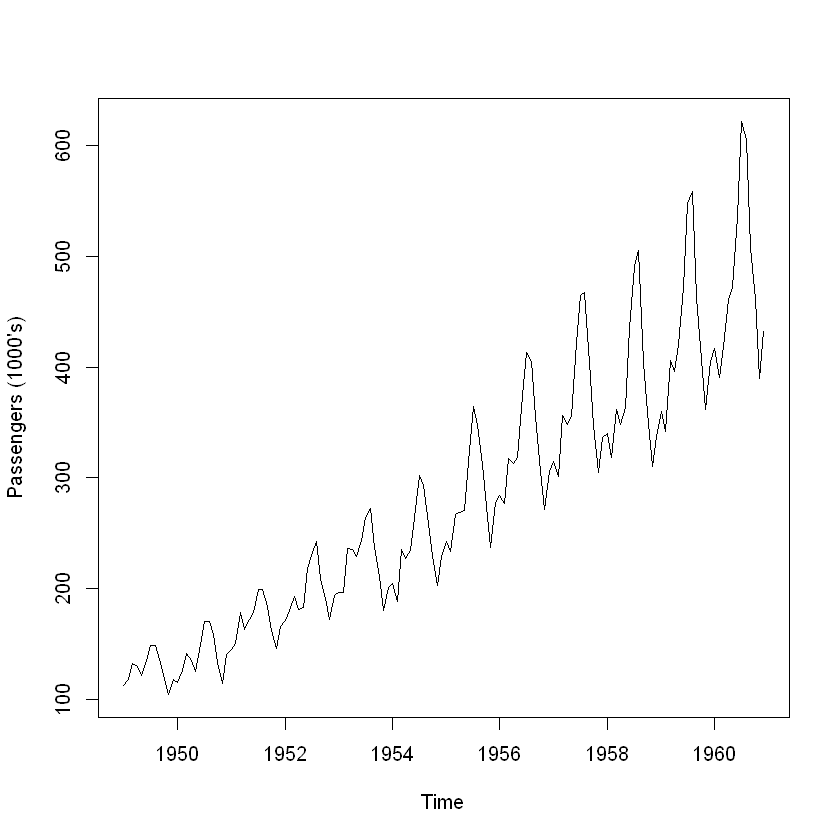

In [7]:
plot(AP, ylab = "Passengers (1000's)")

A few things to note about this plot:

+ The number of passengers on the airline is going up
+ There appears to be a pattern within each year

The first observation, a systematic change in a time series that doesn't seem periodic is called a *trend*. The second is a *seasonal variation* and is a pattern that repeats within a fixed period (hence it seems periodic). This seasonal variation may be removed by aggregating the data to a different level. Here we aggregate to the annual level to remove the periodic observation with the aggregate() function:

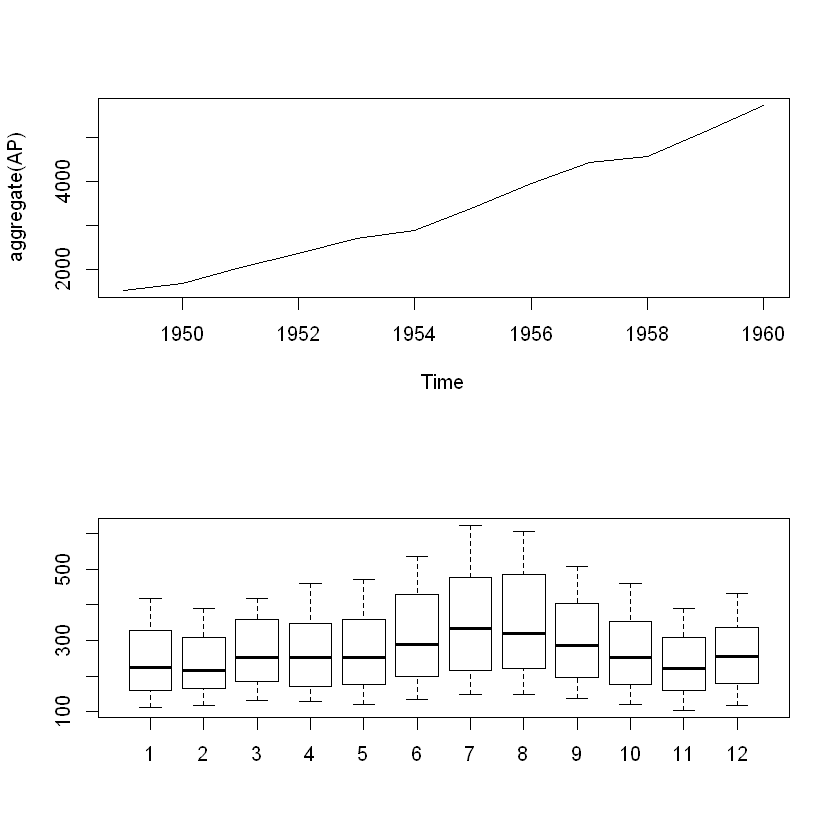

In [8]:
layout(1:2) # about to produce two graphics in one window, vector/matrix input for layout
plot(aggregate(AP))  # show the time series aggregated to the annual level
boxplot(AP ~ cycle(AP))  # summarize values of each seaon with boxplot, use cycle function toextract the seasons from each item of data

We can see the growing trend in the top plot, and the seasonal effects in the boxplot.